In [1]:
# Runge-Kutta scheme to calculate the orbit of two equal mass binary with ecentricity of 1.
import numpy as np
import matplotlib.pyplot as plt



## The force function returns an array of updated velocities and accelerations for the x and y component of each mass. The force due to acceleration being oposite but equal
$$ F_{12}m = -F_{21}m $$
## components of f array
\begin{eqnarray}
\frac{d x_1}{dt}=v_{x_1}\\
\frac{d v_{x_1}}{dt}=-\frac{GM}{r^3}x_1\\
\frac{d y_1}{dt}=v_{y_1}\\
\frac{d v_{y_1}}{dt}=-\frac{GM}{r^3}y_1\\
\frac{d x_2}{dt}=v_{x_2}\\
\frac{d v_{x_2}}{dt}=\frac{GM}{r^3}x_2\\
\frac{d y_2}{dt}=v_{y_2}\\
\frac{d v_{y_2}}{dt}=\frac{GM}{r^3}y_2
\end{eqnarray}

In [2]:
def f(y):
    """
    params:
    y: array of positions and velocities
    returns:
    f: array of updated velocities and accelerations
    """
    f = np.zeros(8)
    r = np.sqrt((y[0] - y[4])**2 +(y[2] - y[6])**2)
    # mass M
    f[0] = y[1]
    f[1] = -G * M / r**3 * (y[0] - y[4])
    f[2] = y[3]
    f[3] = -G * M / r**3 * (y[2] - y[6])
    # mass m
    f[4] = y[5]
    f[5] = G * M / r**3 * (y[0] - y[4])
    f[6] = y[7]
    f[7] = G*M / r**3 * (y[2] - y[6])
    return f

def rk4(h, y, n):
    """
    runga kutta method for solving ode
    """
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(y)
    k2=h*f(y+0.5*k1)
    k3=h*f(y+0.5*k2)
    k4=h*f(y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y


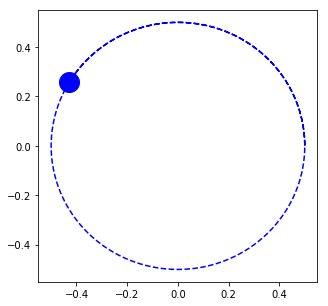

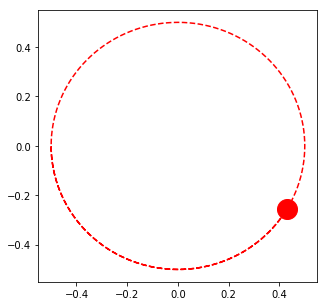

In [3]:

### Initial conditions ###
G=1.
M=1.
m = 1
tend=2.*np.pi 
h=0.001 # step size
vscaler = 1 # scalar for velocity
y=[.5,0.,0.,vscaler * 1/(np.sqrt(2)), -.5, 0., 0., vscaler * -1/(np.sqrt(2)) ] # initial positions and velocities
t=0
###########################


xp=[]
yp=[]
xp1 = []
yp1 = []
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(h,y,8)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    xp1=np.append(xp1,y[4])
    yp1=np.append(yp1,y[6])
    ta=np.append(ta,t)
    t = t+h

i = xp1.size - 1
plt.figure(figsize=(5,5))
plt.plot(xp,yp,'b--')
xpp = xp[i]
ypp = yp[i]
plt.scatter(xpp,ypp, marker='o', s=400, c = 'b')
plt.show()

xp1p = xp1[i]
yp1p = yp1[i]
plt.figure(figsize=(5,5))
plt.plot(xp1,yp1, 'r--')
plt.scatter(xp1p,yp1p, marker='o', s=400, c = 'r')
plt.show()

In [4]:
from vpython import *

m1 = sphere(pos=vector(.5,0,0), radius=.10, color=color.blue, make_trail=True, interval=10, retain=100)
m2 = sphere(pos=vector(-.5,0,0), radius=.10, color=color.red, make_trail=True, interval=10, retain=100)



i = 0
while True:
    rate(200)
    if i < xp.size:
        
        m1.pos = vector(xp[i], yp[i],0)
        m2.pos = vector(xp1[i],yp1[i],0)
        i+=1
    else:
        break



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>